#import libraries

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# data loading and cleaning


In [ ]:
#load the dataset
df=pd.read_csv('/content/retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
#data cleaning
#check for missing values
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


Descriptive Statistics

In [ ]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [ ]:
# Mode, Median, Standard Deviation of Total Amount
print("Mode of Total Amount:", df['Total Amount'].mean())
print("Mode of Total Amount:", df['Total Amount'].mode()[0])
print("Median of Total Amount:", df['Total Amount'].median())
print("Standard Deviation of Total Amount:", df['Total Amount'].std())


Mode of Total Amount: 456.0
Mode of Total Amount: 50
Median of Total Amount: 135.0
Standard Deviation of Total Amount: 559.997631555123


Time Series Analysis

In [ ]:
# Group by month and sum Total Amount
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum()




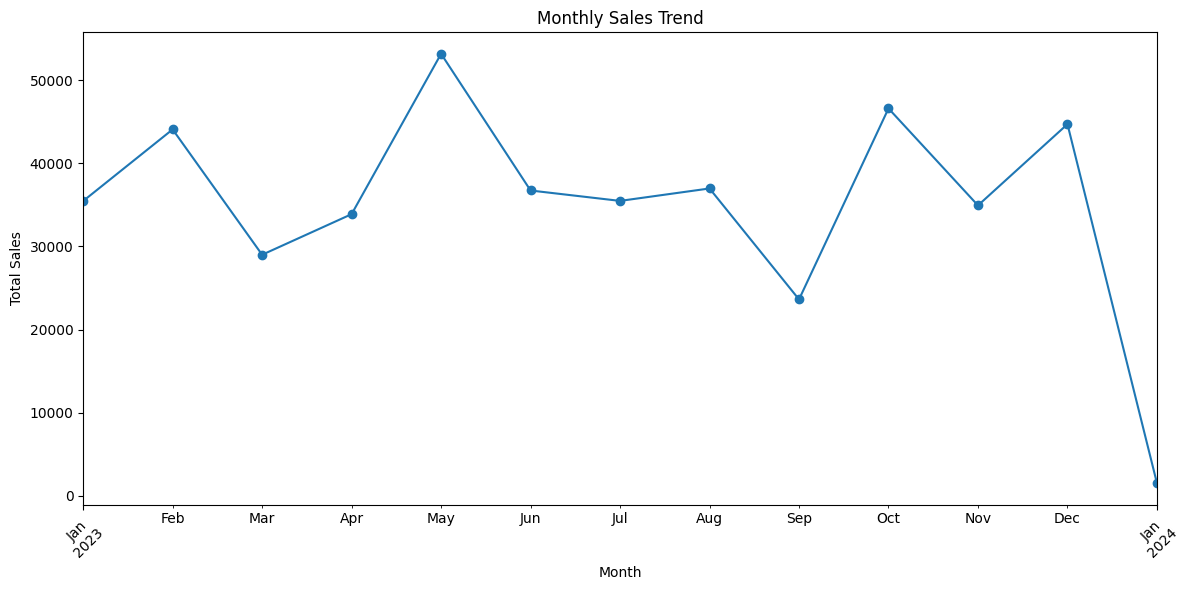

In [ ]:
# Plot monthly sales trend
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Customer and Product Analysis

In [ ]:
# Top 10 customers by total spend
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Spend:")
print(top_customers)

Top 10 Customers by Spend:
Customer ID
CUST015    2000
CUST412    2000
CUST970    2000
CUST547    2000
CUST281    2000
CUST416    2000
CUST420    2000
CUST927    2000
CUST447    2000
CUST342    2000
Name: Total Amount, dtype: int64


In [ ]:
# Top 10 product categories by revenue
top_categories = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print("Revenue by Product Category:")
print(top_categories)

Revenue by Product Category:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


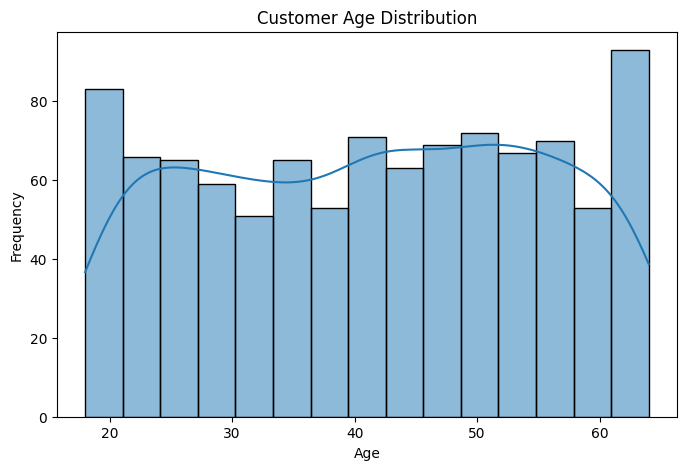

In [ ]:
# Age distribution of customers
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Visualizations

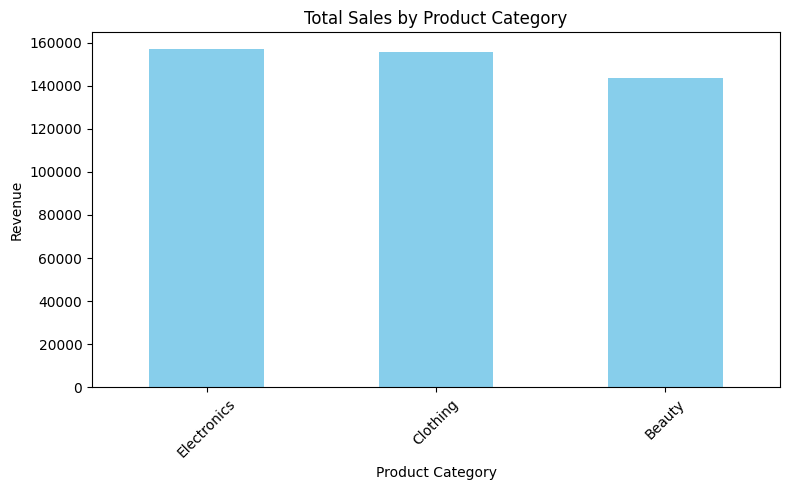

In [ ]:
# Bar chart of top product categories
plt.figure(figsize=(8,5))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

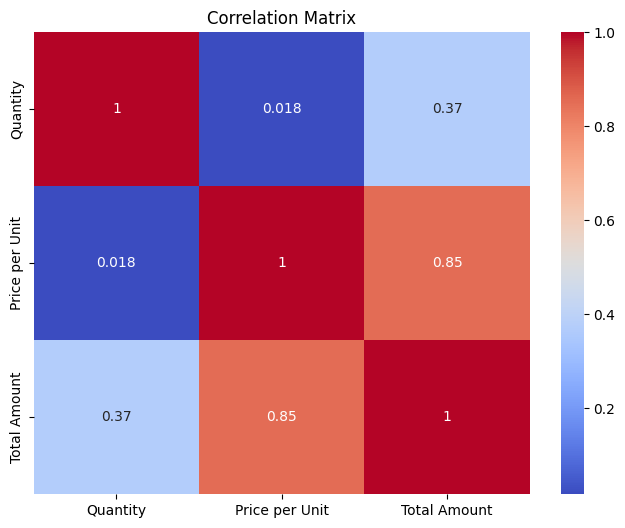

In [ ]:
# Heatmap of correlations
plt.figure(figsize=(8,6))
sns.heatmap(df[['Quantity', 'Price per Unit', 'Total Amount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()